In [165]:
#operating system 
import os

import numpy as np
import pandas as pd

#to handle json files
import json

from geopy.extra.rate_limiter import RateLimiter
import time


# convert an address into latitude and longitude values
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

#--Web scraping packages
from bs4 import BeautifulSoup
# library to handle requests
import requests 

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors

 #import folium for map rendering 
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


## Get Ethnic Groups Data by Borough 

Excel from from https://data.london.gov.uk/dataset/ethnic-groups-borough which contains the ethnic  groups data numbers in every London's Boroughs till 2018 

In [166]:
# The code was removed by Watson Studio for sharing.

In [167]:
london_table_ethnic=df_data_0[["Area","White","Asian","Black","Mixed/ Other"]]
london_table_ethnic=london_table_ethnic[1:].reset_index(drop=True)
london_table_ethnic=london_table_ethnic.replace(to_replace="-" , value=4000)
london_table_ethnic

,Area,White,Asian,Black,Mixed/ Other
0,Barking and Dagenham,109000.0,54000.0,36000,15000.0
1,Barnet,250000.0,57000.0,30000,54000.0
2,Bexley,195000.0,17000.0,21000,15000.0
3,Brent,102000.0,107000.0,62000,56000.0
4,Bromley,267000.0,15000.0,21000,28000.0
5,Camden,158000.0,39000.0,19000,38000.0
6,Croydon,227000.0,70000.0,64000,24000.0
7,Ealing,174000.0,96000.0,23000,50000.0
8,Enfield,206000.0,37000.0,74000,20000.0
9,Greenwich,178000.0,39000.0,48000,19000.0


## Scrape London Boroughs Data from Wikipedia page 


In [168]:
url="https://en.wikipedia.org/wiki/List_of_London_boroughs"


#Create a handle, page, to handle the contents of the website
page=requests.get(url).text
soup=BeautifulSoup(page,"html.parser")
table=soup.find("table",{"class":"wikitable sortable"})

london_table=pd.read_html(str(table))[0]    
london_table_Borough=london_table[["Borough","Co-ordinates"]]
london_table_Borough.iloc[0,0]="Barking and Dagenham"
london_table_Borough.iloc[9,0]="Greenwich"
london_table_Borough.iloc[11,0]="Hammersmith and Fulham"
london_table_Borough.reset_index()
london_table_Borough

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.p

,Borough,Co-ordinates
0,Barking and Dagenham,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
5,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
6,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
7,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
8,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W
9,Greenwich,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E


In [169]:
asian_london_table=london_table_ethnic[["Area","Asian"]]
asian_london_table

,Area,Asian
0,Barking and Dagenham,54000.0
1,Barnet,57000.0
2,Bexley,17000.0
3,Brent,107000.0
4,Bromley,15000.0
5,Camden,39000.0
6,Croydon,70000.0
7,Ealing,96000.0
8,Enfield,37000.0
9,Greenwich,39000.0


<BarContainer object of 32 artists>

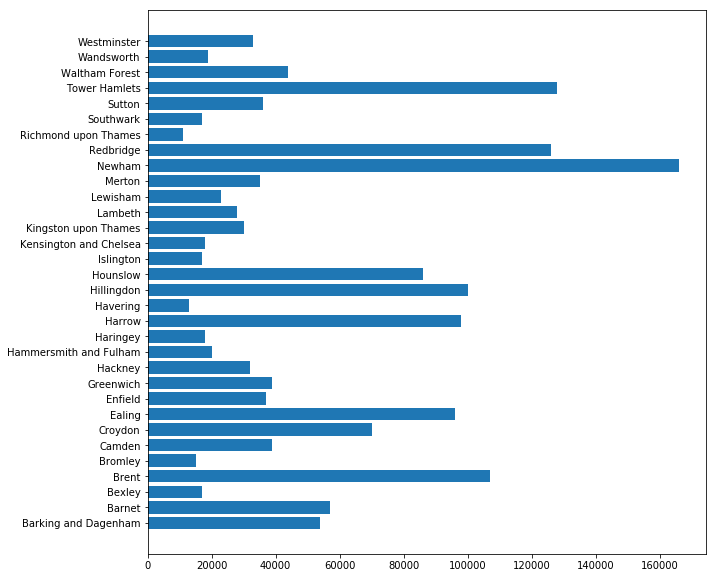

In [170]:
import matplotlib.pyplot as plt
areas=asian_london_table['Area']
asians=asian_london_table['Asian']


plt.figure(figsize=(10,10)) 
plt.barh(areas,asians)

# Get Earnings per hour Data by Borough
Excel from from https://data.london.gov.uk/dataset/ which contains the earnings per hour data in every London's Boroughs till 2019

In [171]:

body = client_761f5eae420b46bfa5ca4e431d9ba75b.get_object(Bucket='datasciencecourseracapstone-donotdelete-pr-jh7wpfejmixohs',Key='Earnings.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_excel(body)



In [172]:
london_table_earning=df_data_1
london_table_earning=london_table_earning[1:].reset_index(drop=True)
london_table_earning.head()

,Area,2019
0,Barking and Dagenham,15.09
1,Barnet,17.73
2,Bexley,16.97
3,Brent,15.67
4,Bromley,20.9


<BarContainer object of 32 artists>

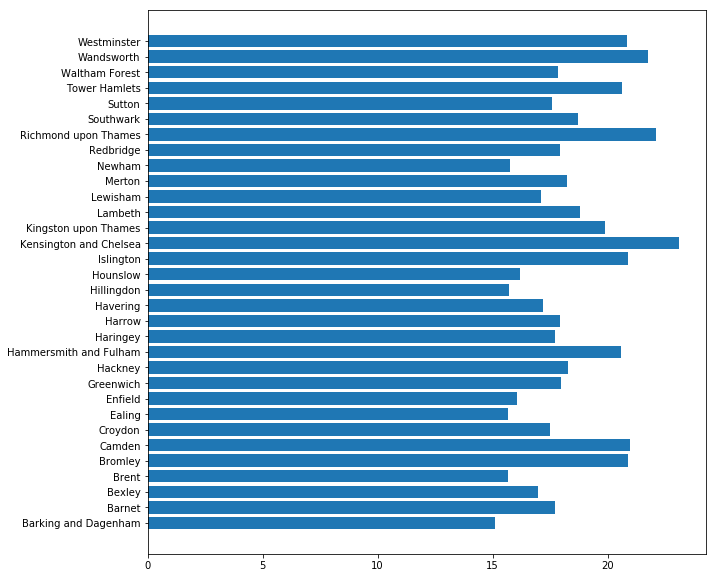

In [173]:
area_earnings=london_table_earning['Area']
earnings=london_table_earning[2019]

plt.figure(figsize=(10,10))
plt.barh(area_earnings,earnings)


# Get Working hours by Borough
Excel from https://data.london.gov.uk/dataset/ which contains the working hours data in every London's Boroughs, The data is divided into categories of hours , We will work only with the category of % of all in employment who work 35-44 hours as it is the heighest percantage of all categories 

In [174]:

body = client_761f5eae420b46bfa5ca4e431d9ba75b.get_object(Bucket='datasciencecourseracapstone-donotdelete-pr-jh7wpfejmixohs',Key='Working Hours.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_excel(body)
df_data_2.head()

,Unnamed: 0,% of all in employment who work 35-44 hours,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Area,number,In employment,percent,confidence
1,NaN,NaN,NaN,NaN,NaN
2,City of London,38500,77500,49.7,5.2
3,Barking and Dagenham,73100,174000,42,5.2
4,Barnet,51000,105900,48.1,5.5


In [175]:
london_working_hours=df_data_2[['Unnamed: 0','Unnamed: 3']]
london_working_hours.columns=["Boroughs","Working Hours%"]
london_working_hours=london_working_hours[3:].reset_index(drop=True)
london_working_hours['Working Hours%'][5]=42.43
london_working_hours.head()

,Boroughs,Working Hours%
0,Barking and Dagenham,42
1,Barnet,48.1
2,Bexley,47.2
3,Brent,45.8
4,Bromley,36.5


<BarContainer object of 32 artists>

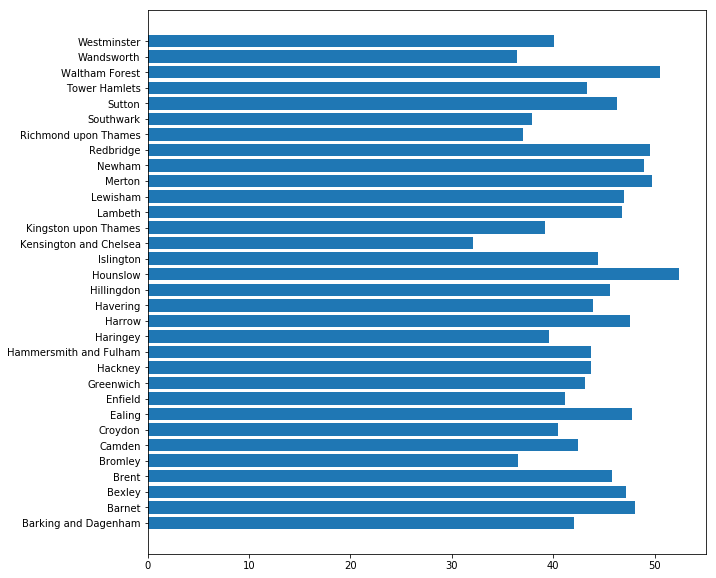

In [176]:
boroughs=london_working_hours['Boroughs']
hours=london_working_hours['Working Hours%']

plt.figure(figsize=(10,10))

plt.barh(boroughs,hours)

# Top Three earning per hour , Working hours and Asian population

In [177]:

print("Top three earning per hour population boroughs:" , london_table_earning['Area'][london_table_earning[2019].astype(str).astype(float).nlargest(3).index.tolist()[0]] , "," , london_table_earning['Area'][london_table_earning[2019].astype(str).astype(float).nlargest(3).index.tolist()[1]] , "and" , london_table_earning['Area'][london_table_earning[2019].astype(str).astype(float).nlargest(3).index.tolist()[2]])
print("Top three Working hours boroughs:" , london_working_hours['Boroughs'][london_working_hours['Working Hours%'].astype(str).astype(float).nlargest(3).index.tolist()[0]] , "," , london_working_hours['Boroughs'][london_working_hours['Working Hours%'].astype(str).astype(float).nlargest(3).index.tolist()[1]] , "and" , london_working_hours['Boroughs'][london_working_hours['Working Hours%'].astype(str).astype(float).nlargest(3).index.tolist()[2]] )
print("Top three Asian population boroughs:" , asian_london_table['Area'][asian_london_table['Asian'].astype(str).astype(float).nlargest(3).index.tolist()[0]] , "," ,  asian_london_table['Area'][asian_london_table['Asian'].astype(str).astype(float).nlargest(3).index.tolist()[1]] , "and" ,  asian_london_table['Area'][asian_london_table['Asian'].astype(str).astype(float).nlargest(3).index.tolist()[2]])
print("The highest borough in working hours , asian population and earning per hour is : ???")

Top three earning per hour population boroughs: Kensington and Chelsea , Richmond upon Thames and Wandsworth
Top three Working hours boroughs: Hounslow , Waltham Forest and Merton
Top three Asian population boroughs: Newham , Tower Hamlets and Redbridge
The highest borough in working hours , asian population and earning per hour is : ???


# using Geopy to get all the Longtitude and Latitude for London Boroughs



In [178]:
london_table=london_table_Borough.copy()
latitude=[]
longitude=[]
for i in range(len(london_table)):
    borough=(london_table['Borough'][i])
    geolocator=Nominatim(user_agent='my-app-location')
    geocode = RateLimiter(geolocator.geocode,min_delay_seconds=1)
    location = geolocator.geocode(borough)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    time.sleep(1.1)

print('Done!')
london_table['latitude']=latitude
london_table['longitude']=longitude

Done!


In [179]:
london_table_coordinates=london_table.drop('Co-ordinates',1)
london_table_coordinates['longitude'][28]=0.0293
london_table_coordinates['latitude'][28]=51.5203
london_table_coordinates['longitude'][20]=0.1178
london_table_coordinates['latitude'][20]=51.4935
london_table_coordinates['longitude'][23]=0.0352
london_table_coordinates['latitude'][23]=51.5255


london_table_coordinates    




/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ip

,Borough,latitude,longitude
0,Barking and Dagenham,51.554117,0.150504
1,Barnet,51.648784,-0.172913
2,Bexley,39.969238,-82.936864
3,Brent,32.937346,-87.164718
4,Bromley,51.402805,0.014814
5,Camden,39.944840,-75.119891
6,Croydon,51.371305,-0.101957
7,Ealing,51.512655,-0.305195
8,Enfield,51.652085,-0.081018
9,Greenwich,51.482084,-0.004542


# Getting the coordinates of London City¶



In [180]:
address = 'London, England'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
lat_e = location.latitude
long_e = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(lat_e, long_e))

The geograpical coordinate of London City are 51.5073219, -0.1276474.


# Creating a map of London City with every  Borough's Asian population .


In [181]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[lat_e, long_e], zoom_start=10)

# add markers to map
for lat, lng, borough, asians ,earnings , hours in zip(london_table_coordinates['latitude'], london_table_coordinates['longitude'], london_table_coordinates['Borough'], asian_london_table['Asian'] , london_table_earning[2019] , london_working_hours['Working Hours%']):
    label = '{}, {}'.format(asians, borough , earnings , hours)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_london)  
    
map_london



# Utilizing the Foursquare API to explore the neighborhoods and segment them
#### Defining Foursquare Credentials and Version

In [182]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: NJ5SFCZEZFG0YE2OOEDRZQQVYJ2WOWFX4MA4JAPKN3QDNYR1
CLIENT_SECRET:V5JNJ4XC25SMHZ4MBLR0ZEB1VA4S04VTKLPJZBY1CHSZ3BAU


#### Creating a dataframe with all the venues information provided by foursquare for the given latitude and longitude values


In [183]:
venues = []
#Now, let's get the top 100 venues that are within a radius of 500 meters.
radius = 1000


for lat, long , borough, asians , hours , earnings  in zip(london_table_coordinates['latitude'],london_table_coordinates['longitude'], london_table_coordinates['Borough'],asian_london_table['Asian'] ,  london_working_hours['Working Hours%'] , london_table_earning[2019]):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            borough,
            asians,
            earnings,
            hours,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [184]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Borough', 'Asians' , "Earnings per hour" , 'Working hours', 'Borough Latitude', 'Borough Longitude', 'Venue Name', 'Venue Latitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1679, 10)


,Borough,Asians,Earnings per hour,Working hours,Borough Latitude,Borough Longitude,Venue Name,Venue Latitude,VenueLongitude,VenueCategory
0,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Lara Grill,51.562445,0.147178,Turkish Restaurant
2,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Iceland,51.560578,0.147685,Grocery Store
3,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Shell,51.560415,0.148364,Gas Station
4,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store


In [185]:
#Let's check how many venues were returned for each Borough
venues_df.groupby(["Borough" , "Asians" , "Earnings per hour" ,"Working hours" ]).count()

,,,,Borough Latitude,Borough Longitude,Venue Name,Venue Latitude,VenueLongitude,VenueCategory
Borough,Asians,Earnings per hour,Working hours,,,,,,
Barking and Dagenham,54000.0,15.09,42.00,21,21,21,21,21,21
Barnet,57000.0,17.73,48.10,21,21,21,21,21,21
Bexley,17000.0,16.97,47.20,9,9,9,9,9,9
Brent,107000.0,15.67,45.80,2,2,2,2,2,2
Bromley,15000.0,20.90,36.50,57,57,57,57,57,57
Camden,39000.0,20.99,42.43,31,31,31,31,31,31
Croydon,70000.0,17.51,40.50,95,95,95,95,95,95
Ealing,96000.0,15.66,47.80,100,100,100,100,100,100
Enfield,37000.0,16.06,41.20,45,45,45,45,45,45


In [186]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 246 uniques categories.


In [187]:
venues_df['VenueCategory'].unique()[:246]

array(['Park', 'Turkish Restaurant', 'Grocery Store', 'Gas Station',
       'Bus Stop', 'Supermarket', 'Liquor Store', 'Convenience Store',
       'Gym / Fitness Center', 'Diner', 'Martial Arts Dojo', 'Pool',
       'Bus Station', 'Pub', 'Gym', 'Clothing Store', 'Golf Course',
       'Café', 'Coffee Shop', 'Train Station', 'Fast Food Restaurant',
       'Toy / Game Store', 'Tennis Court', 'Wine Shop',
       'Chinese Restaurant', 'Sculpture Garden', 'Indian Restaurant',
       'Mediterranean Restaurant', 'Baseball Field',
       'Monument / Landmark', 'Chiropractor', 'Ice Cream Shop',
       'Electronics Store', 'Department Store', 'Bar', 'Burger Joint',
       'Indie Movie Theater', 'Furniture / Home Store',
       'Asian Restaurant', 'Pizza Place', 'Portuguese Restaurant',
       'Bookstore', 'Sandwich Place', 'Chocolate Shop', 'Irish Pub',
       'Donut Shop', 'Burrito Place', 'Gastropub', 'Stationery Store',
       'Sushi Restaurant', 'Bakery', 'Theater', 'Movie Theater',
       'M

# Extracting only Asian restaurants from venue category list and creating a dataframe "London_Asian_Restaurants"¶


In [188]:
London_Asian_Restaurants = venues_df[venues_df['VenueCategory'].str.contains("Chinese|Asian|Sushi|Malay|Indian|Vietnamese|Japanese|Afghan|Korean|Sri Lankan")]
London_Asian_Restaurants.shape
London_Asian_Restaurants.reset_index()

,index,Borough,Asians,Earnings per hour,Working hours,Borough Latitude,Borough Longitude,Venue Name,Venue Latitude,VenueLongitude,VenueCategory
0,35,Barnet,57000.0,17.73,48.1,51.648784,-0.172913,ChuChinChow,51.644024,-0.162115,Chinese Restaurant
1,40,Barnet,57000.0,17.73,48.1,51.648784,-0.172913,New Curry Centre,51.646795,-0.186840,Indian Restaurant
2,62,Bromley,15000.0,20.90,36.5,51.402805,0.014814,wagamama,51.404082,0.018032,Asian Restaurant
3,89,Bromley,15000.0,20.90,36.5,51.402805,0.014814,YO! Sushi,51.403704,0.016866,Sushi Restaurant
4,99,Bromley,15000.0,20.90,36.5,51.402805,0.014814,Tamasha,51.406949,0.027044,Indian Restaurant
5,108,Bromley,15000.0,20.90,36.5,51.402805,0.014814,Mount Everest,51.408657,0.010078,Indian Restaurant
6,152,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Uncle Lim's Malaysian Kitchen,51.375215,-0.100454,Malay Restaurant
7,153,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Kokoro,51.373977,-0.098441,Sushi Restaurant
8,156,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Coqfighter Chicken & Beer,51.375044,-0.093591,Korean Restaurant
9,163,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Karnavar Restaurant,51.365489,-0.098970,Indian Restaurant


In [189]:
london_asian_grouped=London_Asian_Restaurants.groupby(["Borough","Earnings per hour","Working hours","Borough Longitude","Borough Latitude"]).count()
london_asian_grouped


,,,,,Asians,Venue Name,Venue Latitude,VenueLongitude,VenueCategory
Borough,Earnings per hour,Working hours,Borough Longitude,Borough Latitude,,,,,
Barnet,17.73,48.1,-0.172913,51.648784,2,2,2,2,2
Bromley,20.90,36.5,0.014814,51.402805,4,4,4,4,4
Croydon,17.51,40.5,-0.101957,51.371305,8,8,8,8,8
Ealing,15.66,47.8,-0.305195,51.512655,6,6,6,6,6
Enfield,16.06,41.2,-0.081018,51.652085,2,2,2,2,2
Greenwich,17.95,43.1,-0.004542,51.482084,5,5,5,5,5
Hackney,18.29,43.7,-0.049362,51.543240,3,3,3,3,3
Hammersmith and Fulham,20.60,43.7,-0.223640,51.492038,6,6,6,6,6
Haringey,17.72,39.6,-0.105410,51.587930,1,1,1,1,1


# Get Borough's clusters¶


### Finding the best k¶


In [190]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


In [191]:
london_clustering=London_Asian_Restaurants[['Asians',"Earnings per hour","Working hours"]]
london_clustering

,Asians,Earnings per hour,Working hours
35,57000.0,17.73,48.1
40,57000.0,17.73,48.1
62,15000.0,20.90,36.5
89,15000.0,20.90,36.5
99,15000.0,20.90,36.5
108,15000.0,20.90,36.5
152,70000.0,17.51,40.5
153,70000.0,17.51,40.5
156,70000.0,17.51,40.5
163,70000.0,17.51,40.5


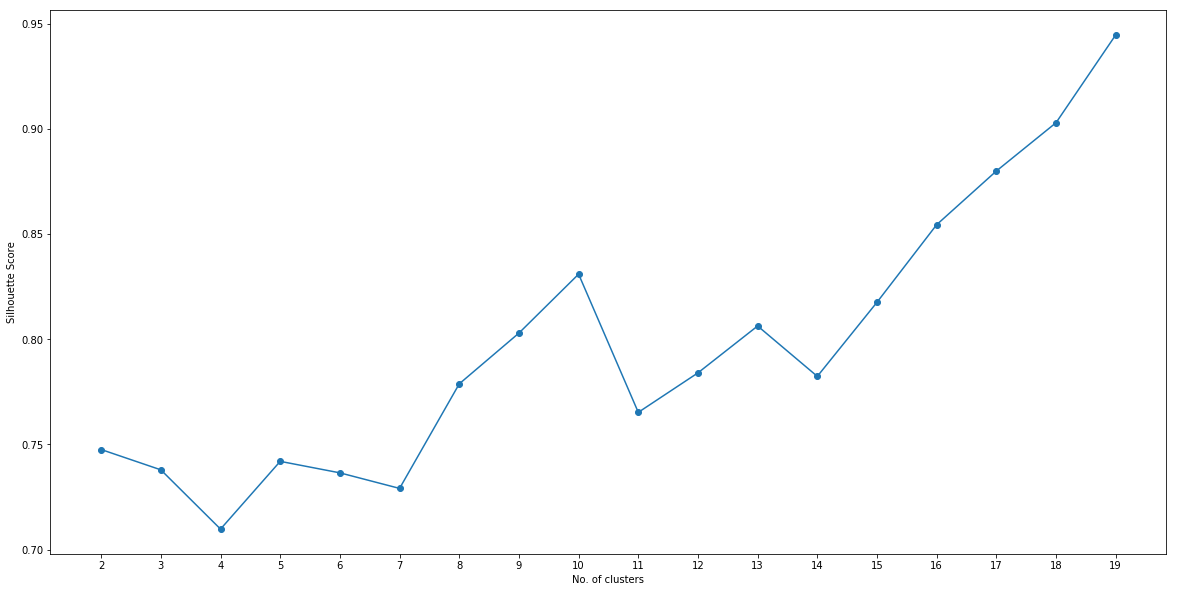

In [192]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
indices = []
scores = []
max_range = 20

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    lct = london_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(lct)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(lct, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    

plot(max_range, scores, "No. of clusters", "Silhouette Score")


In [193]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

19

In [194]:
# set number of clusters
kclusters = opt


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([ 9,  9, 11, 11, 11, 11,  4,  4,  4,  4,  4,  4,  4,  4,  1,  1,  1,
        1,  1,  1, 18, 18, 10, 10, 10, 10, 10, 15, 15, 15,  6,  6,  6,  6,
        6,  6, 16, 14, 14, 14, 17, 17,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7, 13, 13, 13, 13, 13, 13, 13, 16, 16, 16, 16, 16, 16, 16,  8,  8,
        8,  8,  8,  8,  8,  2,  2, 12, 12, 12, 12, 12,  3, 13, 13, 13,  5,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  6,  6], dtype=int32)

## Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.¶


In [195]:
# add clustering labels
London_Asian_Restaurants.insert(0, 'Cluster Labels', kmeans.labels_)
London_merged = London_Asian_Restaurants

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
London_merged.fillna(0)


London_merged # check the last columns!



,Cluster Labels,Borough,Asians,Earnings per hour,Working hours,Borough Latitude,Borough Longitude,Venue Name,Venue Latitude,VenueLongitude,VenueCategory
35,9,Barnet,57000.0,17.73,48.1,51.648784,-0.172913,ChuChinChow,51.644024,-0.162115,Chinese Restaurant
40,9,Barnet,57000.0,17.73,48.1,51.648784,-0.172913,New Curry Centre,51.646795,-0.186840,Indian Restaurant
62,11,Bromley,15000.0,20.90,36.5,51.402805,0.014814,wagamama,51.404082,0.018032,Asian Restaurant
89,11,Bromley,15000.0,20.90,36.5,51.402805,0.014814,YO! Sushi,51.403704,0.016866,Sushi Restaurant
99,11,Bromley,15000.0,20.90,36.5,51.402805,0.014814,Tamasha,51.406949,0.027044,Indian Restaurant
108,11,Bromley,15000.0,20.90,36.5,51.402805,0.014814,Mount Everest,51.408657,0.010078,Indian Restaurant
152,4,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Uncle Lim's Malaysian Kitchen,51.375215,-0.100454,Malay Restaurant
153,4,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Kokoro,51.373977,-0.098441,Sushi Restaurant
156,4,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Coqfighter Chicken & Beer,51.375044,-0.093591,Korean Restaurant
163,4,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Karnavar Restaurant,51.365489,-0.098970,Indian Restaurant


### Number of Borough belonging to every cluster

In [196]:
London_merged['Cluster Labels'].value_counts()


0     10
13    10
7     10
6      9
4      8
16     8
8      7
1      6
12     5
10     5
11     4
15     3
14     3
2      2
18     2
17     2
9      2
3      1
5      1
Name: Cluster Labels, dtype: int64

## Creating map for each cluster for better visualization¶


In [197]:
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon,cluster,poi in zip(London_Asian_Restaurants['Venue Latitude'], London_Asian_Restaurants['VenueLongitude'], London_Asian_Restaurants['Cluster Labels'], London_Asian_Restaurants['VenueCategory']):

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
        count


map_clusters

IndentationError: unexpected indent (<ipython-input-197-d889582c226a>, line 22)

## Final analysis of each cluster
Now, examining each cluster.


In [ ]:
c1 = London_merged.loc[London_merged['Cluster Labels'] == 3, London_merged.columns[[0]+[1]+list(range(8, London_merged.shape[1]))]]
c1.drop_duplicates()